In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# here we are gonna read the .csv files avaialable to us 
train_csv = pd.read_csv("/content/train (2).csv")
test_csv = pd.read_csv("/content/test.csv")

In [65]:
# printing the first three rows of the train_csv dataset 
# ideally if u dont specify anything it shows 5 rows
train_csv.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [66]:
# checking what all columns in the train_csv dataset contains null values 
# u can use .isnull() also and it will give the same result 
train_csv.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
# doing the same for the test_csv dataset 
test_csv.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
# i find the no of rwos and columns using .shape 
train_csv.shape

(891, 12)

In [69]:
# we are gonna drop the cabin column cuz it cotains more than  null values
# the axis parameter shows whether the dropped thing is a row or a column( 0 for row and 1 for coulmn)
# the inplace parameter is of the utmost importance
# it shows whether or not to save these changes in the actual dataset 
train_csv.drop("Cabin",axis = 1,inplace= True)
test_csv.drop("Cabin",axis =1,inplace= True)
# ALTERNATIVE TO (inplace = True):-
# train_csv["Cabin"] = trrain_csv.drop("Cabin",axis = 1)

In [70]:
# checking if the csbin volumn is dropped successfully
# it always a good habit to check if we have managed to successfully fo a certain task by using .head()
train_csv.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [71]:
test_csv.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [72]:
# checking the no of different values in the Ticket column and their no of occurances 
train_csv["Ticket"].value_counts()

CA. 2343            7
347082              7
1601                7
3101295             6
CA 2144             6
                   ..
STON/O2. 3101283    1
367655              1
349251              1
SC/AH Basle 541     1
S.C./A.4. 23567     1
Name: Ticket, Length: 681, dtype: int64

In [73]:
# checking if there are any repeated rows 
# since same repeated rows do not offer any additional data we must drop then
d = train_csv.duplicated()
print(d.any())

False


In [74]:
d = test_csv.duplicated()
print(d.any())

False


In [75]:
# Also here the columnsn Name, PassengerId are absolutely unique and serve 
# only as an identifier for a person
# Since they are absolutely unique they do not give us any relevant information
# and are thus dropped 
train_csv.drop("Name",axis = 1,inplace = True)
test_csv.drop("Name",axis = 1,inplace = True)
train_csv.drop("PassengerId",axis = 1,inplace= True)
ans = test_csv["PassengerId"]
test_csv.drop("PassengerId",axis = 1,inplace= True)

In [76]:
train_csv.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.25,S


In [77]:
# this allows us to check the datatype of each of the columns 
train_csv.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [78]:
# we are converting the datatype of the Embarked column cuz we cannot apply 
# LabelEncoding to an object dtype column
train_csv["Embarked"] = train_csv["Embarked"].astype(str)
test_csv["Embarked"] = test_csv["Embarked"].astype(str)

In [79]:
train_csv.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [80]:
train_csv["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [81]:
# checking the no ofmales and females that survived the crash 
# we can notice that there is an uneven balance between the survivors based on their gender
# a bit later we will observe the difference between survival ability between the men and females 
# alomg with many other factors added in the mix 
train_csv["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [82]:
# seeing the no of classes that were available on the fables titanic 
# and as always there is a starck contrast between the no of people based on Passenger class
train_csv["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

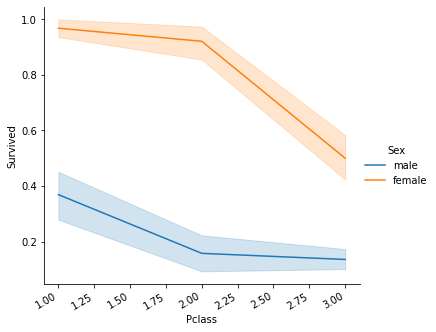

In [83]:
# here we are gonna use the seaborn lib to display the various graphs that will help us 
# ascertain correctly the relationship between the datasets columns
import seaborn as sns
g = sns.relplot(x="Pclass", y="Survived",hue = "Sex",kind="line", data=train_csv)
g.fig.autofmt_xdate()

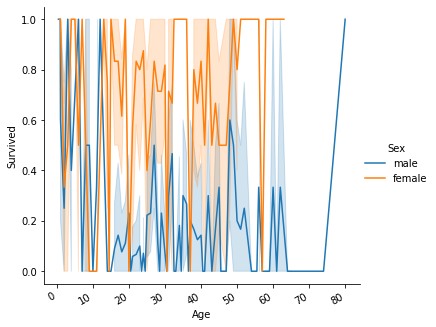

In [84]:
g = sns.relplot(x="Age", y="Survived",hue = "Sex",kind="line", data=train_csv)
g.fig.autofmt_xdate()

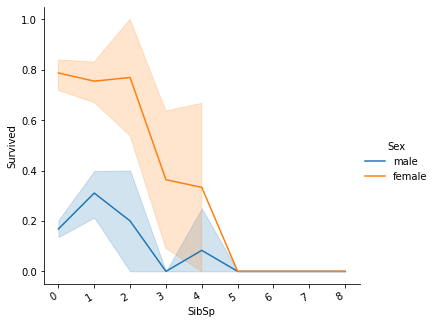

In [85]:
g = sns.relplot(x="SibSp", y="Survived",hue = "Sex",kind="line", data=train_csv)
g.fig.autofmt_xdate()

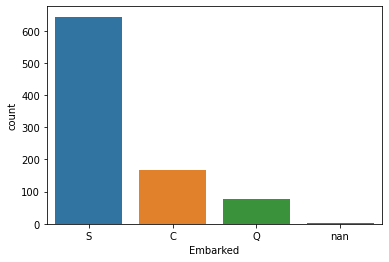

In [86]:
import seaborn as sns
ax = sns.countplot(x="Embarked", data=train_csv)

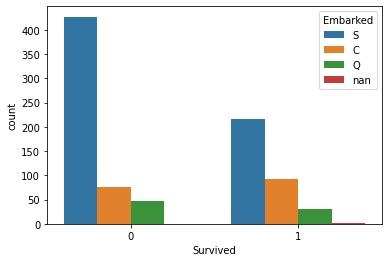

In [87]:
ax = sns.countplot(x = "Survived",hue = "Embarked",data = train_csv)

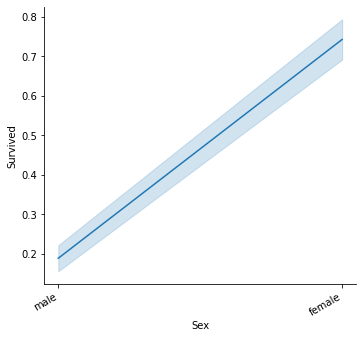

In [88]:
g = sns.relplot(x="Sex", y="Survived", kind="line", data=train_csv)
g.fig.autofmt_xdate()

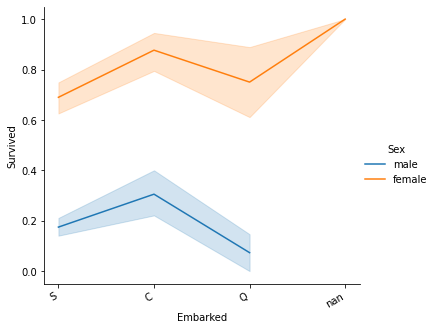

In [89]:
g = sns.relplot(x = "Embarked", y = "Survived",hue = "Sex", kind = "line",data = train_csv)
g.fig.autofmt_xdate()

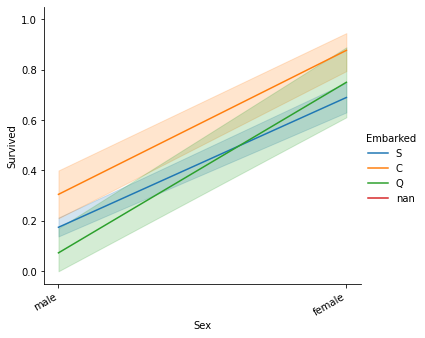

In [90]:
g = sns.relplot(x = "Sex", y = "Survived",hue = "Embarked", kind = "line",data = train_csv)
g.fig.autofmt_xdate()

In [91]:
data = [train_csv, test_csv]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

In [92]:
train_csv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,No
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,No
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,1,1,female,35.0,1,0,113803,53.1000,S,1,No
4,0,3,male,35.0,0,0,373450,8.0500,S,0,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


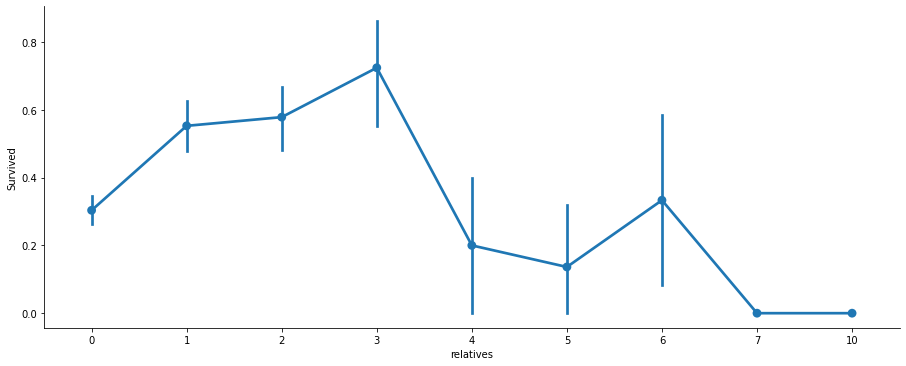

In [93]:
axes = sns.factorplot('relatives','Survived',data=train_csv, aspect = 2.5, );
## from the graph below we can see that the people with 1,2, or 3 relatives have a greater chance of survival 
## as compared to those with no or greater than 3 relatives

In [94]:
train_csv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,No
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,No
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Yes
3,1,1,female,35.0,1,0,113803,53.1000,S,1,No
4,0,3,male,35.0,0,0,373450,8.0500,S,0,Yes


In [95]:
test_csv.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,3,male,34.5,0,0,330911,7.8292,Q,0,Yes
1,3,female,47.0,1,0,363272,7.0000,S,1,No
2,2,male,62.0,0,0,240276,9.6875,Q,0,Yes
3,3,male,27.0,0,0,315154,8.6625,S,0,Yes
4,3,female,22.0,1,1,3101298,12.2875,S,2,No


In [96]:
# we know that in order to implement  model on the dataset we need to have all the 
# columns in numerical format and so by using LabelEncoder we are gonn convert all the 
# categorical values into numercial values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_csv["Sex"] = le.fit_transform(train_csv["Sex"])
train_csv["Embarked"] = le.fit_transform(train_csv["Embarked"])
test_csv["Sex"] = le.fit_transform(test_csv["Sex"])
test_csv["Embarked"] = le.fit_transform(test_csv["Embarked"])
train_csv["travelled_alone"] = le.fit_transform(train_csv["travelled_alone"])
test_csv["travelled_alone"] = le.fit_transform(test_csv["travelled_alone"])

In [97]:
train_csv["Ticket"] = le.fit_transform(train_csv["Ticket"])
test_csv["Ticket"] = le.fit_transform(test_csv["Ticket"])

In [98]:
train_csv.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,0,3,1,22.0,1,0,523,7.2500,2,1,0
1,1,1,0,38.0,1,0,596,71.2833,0,1,0
2,1,3,0,26.0,0,0,669,7.9250,2,0,1


In [99]:
test_csv.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,3,1,34.5,0,0,152,7.8292,1,0,1
1,3,0,47.0,1,0,221,7.0000,2,1,0
2,2,1,62.0,0,0,73,9.6875,1,0,1


In [100]:
train_csv.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
relatives            0
travelled_alone      0
dtype: int64

In [101]:
test_csv.isna().sum()

Pclass              0
Sex                 0
Age                86
SibSp               0
Parch               0
Ticket              0
Fare                1
Embarked            0
relatives           0
travelled_alone     0
dtype: int64

In [102]:
# now that we have to replace the NaN values with something
# we caneither choose to drop the rows altogether if they are sufficently small in nos
# or we can replace them with some other values like mean, mode, etc.
#  HERE we are trying to replace the NaN values with their columns mean 
#train_csv["Age"].fillna(train_csv["Age"].mean(),inplace = True)
#test_csv["Age"].fillna(test_csv["Age"].mean(),inplace = True)
#test_csv.dropna(inplace = True)

In [103]:
y_train = train_csv.iloc[:,0]
x_train = train_csv.iloc[:,1:]
x_test = test_csv.iloc[:,:]

In [104]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [105]:
# we ccan also use Imputers to predit the NaN values substitute
# this methodis quite good but requires more processing time and so should be avoided for big datasets
# here we are using KNNImputer to predict the value of the NaN in the columns 
from sklearn.impute import KNNImputer
imputer = KNNImputer() 
imputer.fit (x_train)
x_train = imputer.transform(x_train)
###############
imputer.fit (x_test)
x_test = imputer.transform(x_test)

In [106]:
train_csv.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,travelled_alone
0,0,3,1,22.0,1,0,523,7.25,2,1,0


In [107]:
array_sum = np.sum(x_train)
array = np.isnan(array_sum)
array

False

In [108]:
array_sum1 = np.sum(x_test)
array = np.isnan(array_sum1)
array

False

In [109]:
# if u notice the values in all the columns then there is quite the difference in their magnitudes
# this can cause the model to be lean towards one column too much
# so we use a concept knows as feature scaling in order to reduce the magitudes to between 0 and 1 
"""
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0, 1))
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\ns = MinMaxScaler(feature_range=(0, 1))\nx_train = s.fit_transform(x_train)\nx_test = s.fit_transform(x_test)\n'

In [110]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [111]:
x_train.shape

(891, 10)

In [112]:
x_test.shape

(418, 10)

In [113]:
from sklearn.feature_selection import VarianceThreshold
transform = VarianceThreshold(0)
x_train = transform.fit_transform(x_train)
x_test = transform.fit_transform(x_test)
print(x_train.shape)

(891, 10)


In [114]:
# this is the most basic model in classification where we import the model and fit it on the dataset 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
# now we wanna predict if the people survive or not 

In [116]:
# here we are gonna use the model and predict the survived of the x_test 
y_test = model.predict(x_test)
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
# this allows to convert an array into a dataset 
final_pred = pd.DataFrame(ans)

In [118]:
final_pred["Survived"] = pd.DataFrame(y_test) 

In [119]:
final_pred.head(7)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1


In [120]:
final_pred.to_csv("pred_ticket_solved_without_minmax.csv",index = False)

In [121]:
# next here we are gonna be using the Descision Tree Classification model to achieve the y_test
# and also we are gonna be implementing many more graphs and try to find out what they mean 